In [1]:
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn import kernel_ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('data_3.csv',  engine = 'python',  on_bad_lines = 'skip', index_col=[0])

In [3]:
warnings.filterwarnings('ignore')

In [4]:
print(data.isnull().sum())

PrimaryPropertyType      0
CouncilDistrictCode      0
YearBuilt                0
NumberofFloors           0
ENERGYSTARScore          0
SiteEUI(kBtu/sf)         0
SourceEUI(kBtu/sf)       0
SteamUse(kBtu)           0
Electricity(kBtu)        0
NaturalGas(kBtu)         0
GHGEmissionsIntensity    0
dtype: int64


In [5]:
data.shape

(1544, 11)

# 2. Analyse des relation entre features, 
   Pour l'émissoin le target est GHGEmissionsIntensity, pour la consommation, le target est SiteEUIWN(kBtu/sf).   Ce sont des valuers unitaires, l'émission et la consommation est obtenue par la multiplication de ces valeurs unitaires avec la surface. 

## 2.1 Normalisation des variables 
Normaliser les variables numériques, car ils ont de grandeurs et unités différentes 
Transformer les variables catégorie en dummy 

In [6]:
variables_num = ['YearBuilt', 'NumberofFloors', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'GHGEmissionsIntensity']

In [7]:
data_num = data[variables_num]
data_num.head()

,YearBuilt,NumberofFloors,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity
0,1927,12,60.0,81.699997,182.500000,2003882.00,3946027.0,1276453.0,2.83
1,1996,11,61.0,94.800003,176.100006,0.00,3242851.0,5145082.0,2.86
2,1969,41,43.0,96.000000,241.899994,21566554.00,49526664.0,1493800.0,2.19
3,1926,10,56.0,110.800003,216.199997,2214446.25,2768924.0,1811213.0,4.67
4,1980,18,75.0,114.800003,211.399994,0.00,5368607.0,8803998.0,2.88


In [8]:
# normaliser les variables numériques
scaler = StandardScaler()
X_num = scaler.fit_transform(data_num)

In [9]:
encoded_data_Type = pd.get_dummies(data['PrimaryPropertyType'], prefix='Type')

In [10]:
encoded_data_District = pd.get_dummies(data['CouncilDistrictCode'], prefix='District')

In [11]:
encoded_data_District.head()

,District_1,District_2,District_3,District_4,District_5,District_6,District_7
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [12]:
features = data_num.columns

In [13]:
pd.DataFrame(X_num).describe().round(2)

,0,1,2,3,4,5,6,7,8
count,1544.00,1544.00,1544.00,1544.00,1544.00,1544.00,1544.00,1544.00,1544.00
mean,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.88,-0.49,-2.67,-0.98,-0.95,-0.10,-0.29,-0.21,-0.69
25%,-0.96,-0.49,-0.35,-0.53,-0.54,-0.10,-0.25,-0.21,-0.55
50%,0.12,-0.34,-0.04,-0.28,-0.24,-0.10,-0.20,-0.16,-0.33
75%,0.83,-0.04,0.68,0.14,0.16,-0.10,-0.04,-0.05,0.12
max,1.63,13.97,1.58,10.12,12.96,23.48,30.23,30.45,13.58


##  2.2 ACP

In [14]:
pca = PCA(n_components=8)

In [15]:
X_pca = pca.fit_transform(X_num)

In [16]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
scree

array([32.37, 17.28, 12.5 , 11.02, 10.22,  8.55,  5.59,  2.31])

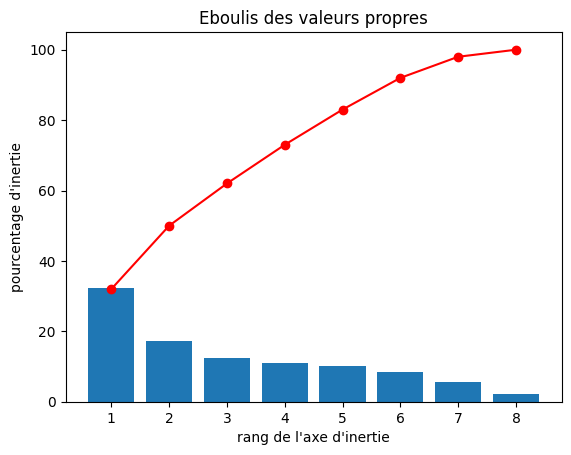

In [17]:
x_list = range(1, 9)
list(x_list)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [18]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,YearBuilt,NumberofFloors,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity
F1,0.11,0.05,-0.19,0.53,0.50,0.18,0.29,0.29,0.47
F2,0.06,0.47,0.29,-0.19,-0.14,0.53,0.58,0.02,-0.16
F3,-0.64,-0.42,-0.23,-0.17,-0.27,0.36,0.12,0.26,0.21
F4,0.01,0.22,0.34,-0.13,-0.22,-0.38,-0.07,0.75,0.23
F5,0.65,-0.19,-0.56,-0.24,-0.24,0.12,0.08,0.29,-0.10
F6,-0.35,0.64,-0.63,-0.03,-0.00,-0.24,-0.00,0.01,-0.12
F7,-0.14,-0.32,0.01,0.03,0.25,-0.42,0.57,0.17,-0.53
F8,0.07,-0.05,-0.04,-0.05,-0.36,-0.41,0.48,-0.42,0.53


<Axes: >

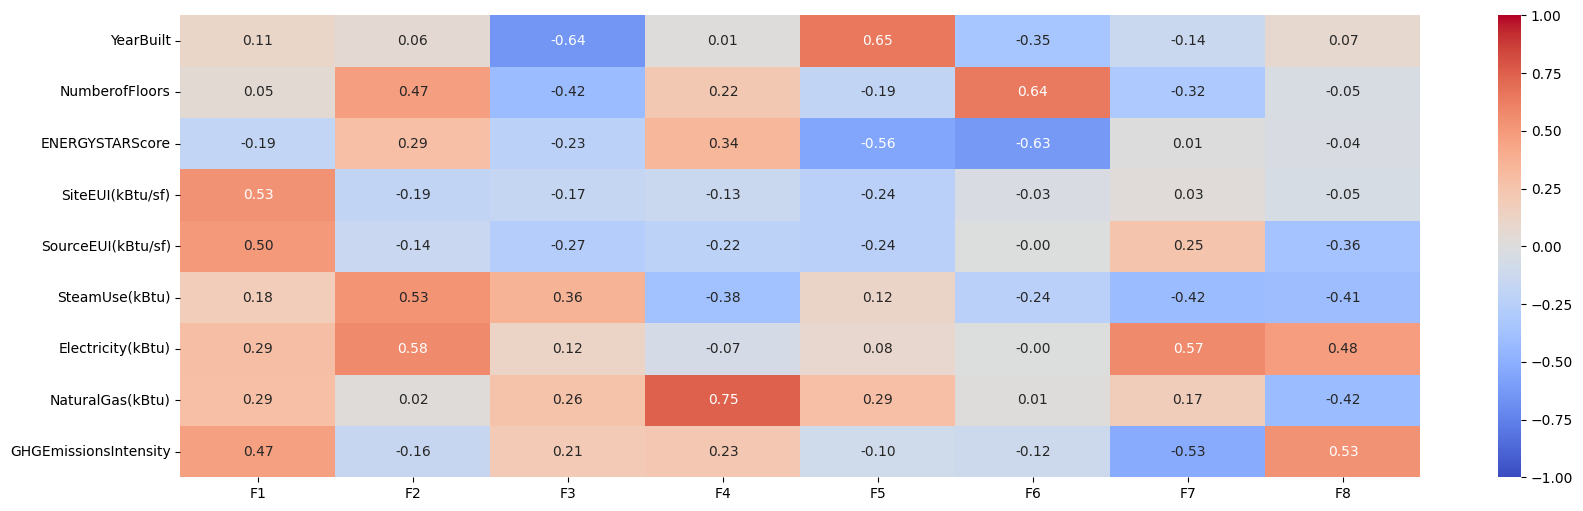

In [19]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [20]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.05,
                head_length=0.05, 
                width=0.01, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.03,
                pca.components_[y, i] + 0.03,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

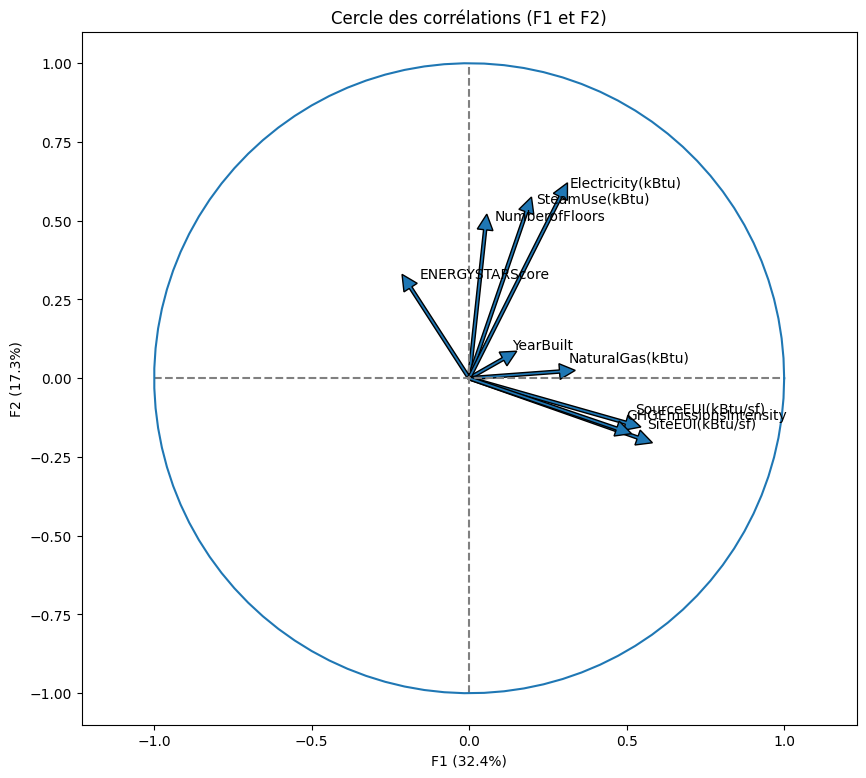

In [21]:
x_y = (0,1)
correlation_graph(pca, x_y, features)

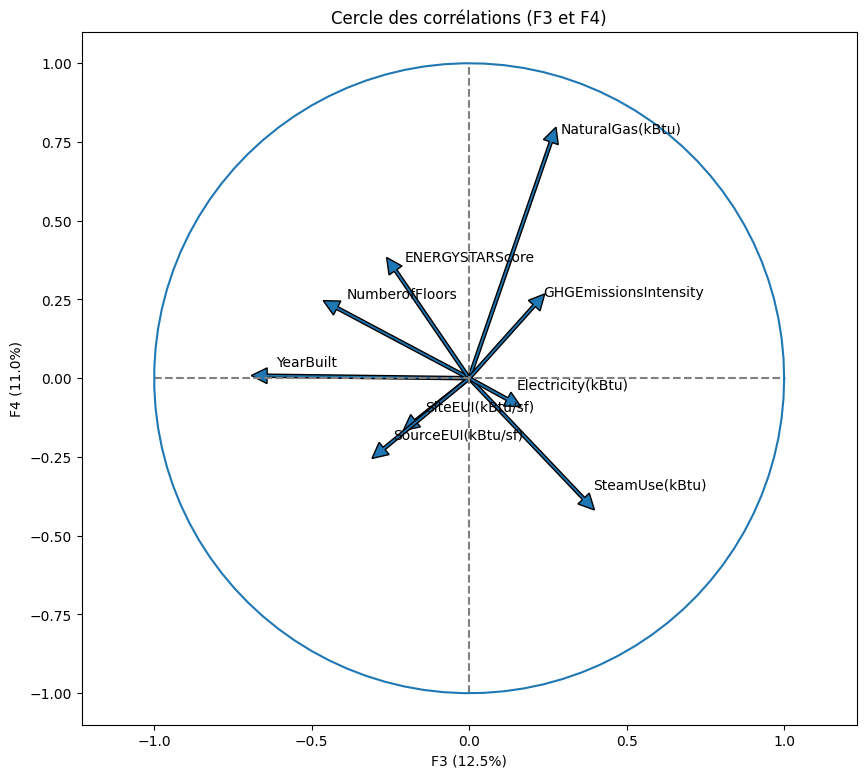

In [22]:
x_y = (2,3)
correlation_graph(pca, x_y, features)

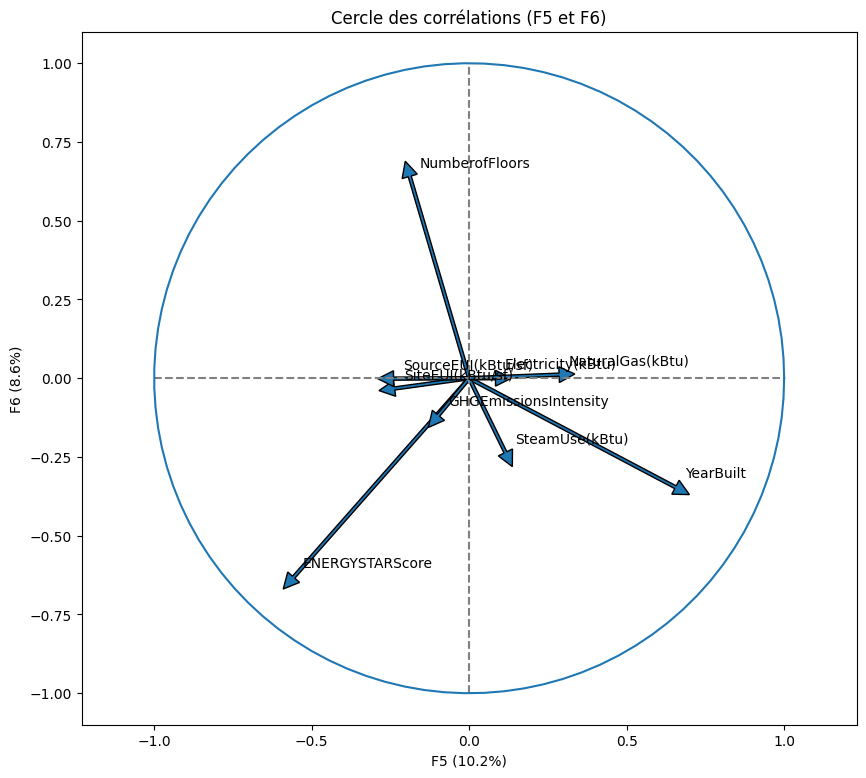

In [23]:
x_y = (4,5)
correlation_graph(pca, x_y, features)

## 2.3   Coorélation 

In [24]:
corr = data_num.corr()['GHGEmissionsIntensity']
print(corr)

YearBuilt                0.001752
NumberofFloors          -0.055555
ENERGYSTARScore         -0.200117
SiteEUI(kBtu/sf)         0.713892
SourceEUI(kBtu/sf)       0.515245
SteamUse(kBtu)           0.190398
Electricity(kBtu)        0.158081
NaturalGas(kBtu)         0.498030
GHGEmissionsIntensity    1.000000
Name: GHGEmissionsIntensity, dtype: float64


features écartées pour GHGEmissionsIntensity:  YearBuilt, SourceEUI(kBtu/sf) (qui est très corrélé avec SiteEUI(kBtu/sf) 

In [25]:
corr = data_num['SiteEUI(kBtu/sf)'].corr(data_num['SourceEUI(kBtu/sf)'])
corr

0.9504860982088901

In [26]:
independants_emission_num = ['NumberofFloors', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']

In [27]:
corr = data_num.corr()['SiteEUI(kBtu/sf)']
print(corr)

YearBuilt                0.134746
NumberofFloors           0.012593
ENERGYSTARScore         -0.237176
SiteEUI(kBtu/sf)         1.000000
SourceEUI(kBtu/sf)       0.950486
SteamUse(kBtu)           0.089630
Electricity(kBtu)        0.252530
NaturalGas(kBtu)         0.235678
GHGEmissionsIntensity    0.713892
Name: SiteEUI(kBtu/sf), dtype: float64


In [28]:
independant_consommation_num = ['YearBuilt', 'NumberofFloors', 'ENERGYSTARScore', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']

# 3 Prédiction emission

## 3.1 vérification de la linéarité

In [29]:
dependent_variable = 'GHGEmissionsIntensity'
independent_variables = ['NumberofFloors', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']

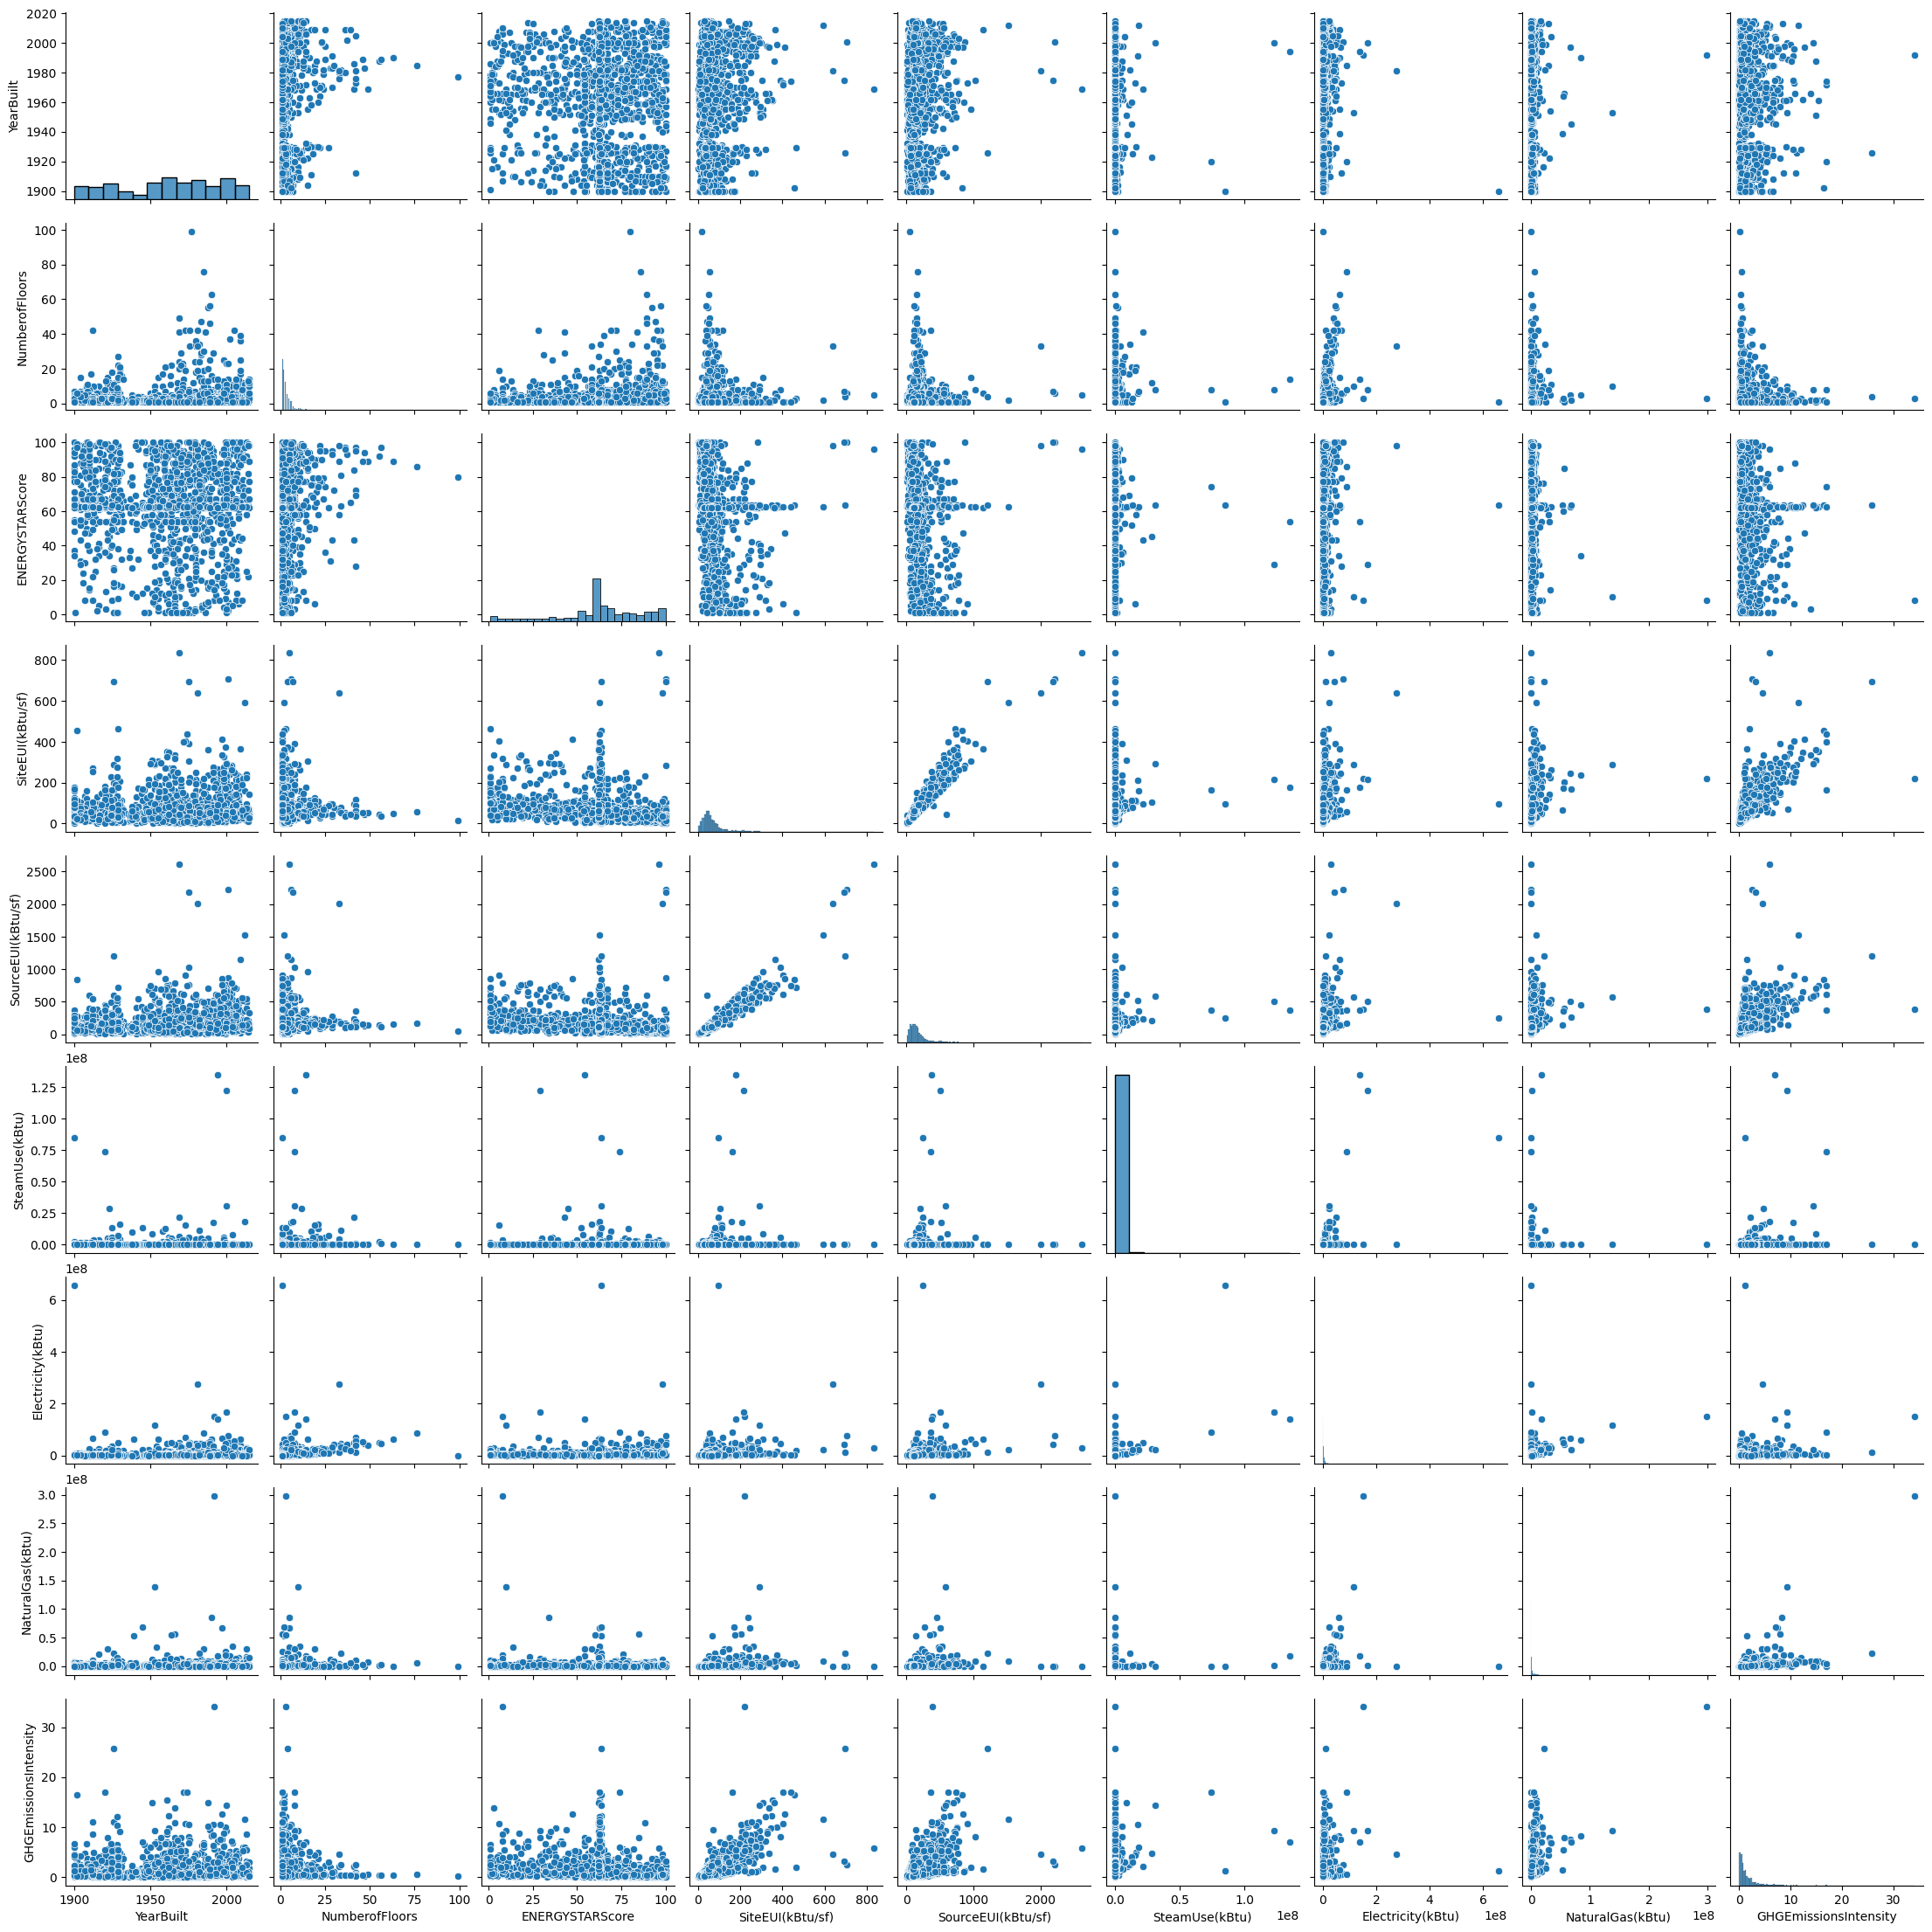

In [30]:
sns.pairplot(data_num)

la relation n'est pas linéaire, il faut utiliser la prédiction non linéaire 

## 3.2. préparation des données

In [32]:
# créer la matrice de données en groupants les variables numériques et catégoreilles transformées

X_pd = pd.concat([data_num[independants_emission_num], encoded_data_Type, encoded_data_District], axis=1)

X_pd.head()

,NumberofFloors,ENERGYSTARScore,SiteEUI(kBtu/sf),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Type_Distribution Center,Type_Hospital,Type_Hotel,Type_K-12 School,...,Type_University,Type_Warehouse,Type_Worship Facility,District_1,District_2,District_3,District_4,District_5,District_6,District_7
0,12,60.0,81.699997,2003882.00,3946027.0,1276453.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,11,61.0,94.800003,0.00,3242851.0,5145082.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,41,43.0,96.000000,21566554.00,49526664.0,1493800.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,10,56.0,110.800003,2214446.25,2768924.0,1811213.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,18,75.0,114.800003,0.00,5368607.0,8803998.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
X_pd.shape

(1544, 34)

In [34]:
X_col =  X_pd.columns
X = X_pd.values
# créer le vecteur d'étiquettes
y = data[dependent_variable].values

In [36]:
# séparation de train et test 
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.2)

Q1:  may be need to remove categorie before normalisation and reintegrate for modeling ?

In [41]:
# normalisation of all variables
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [37]:
# normalisation only numerical variables (suggested)
"""
from sklearn import preprocessing

scaler = StandardScaler()

X_train_pd = pd.DataFrame(X_train, columns=X_col)
X_train_num_pd = X_train_pd[independants_emission_num]
cat_cols = set(X_train_pd.columns).difference(independants_emission_num)
X_train_cat_pd = X_train_pd[list(cat_cols)]

X_train_num = X_train_num_pd.values
X_train_num_std = scaler.fit_transform(X_train_num)
X_train_std_pd = pd.concat([pd.DataFrame(X_train_num_std,  columns=independants_emission_num), X_train_cat_pd], axis=1)
X_train_std = X_train_std_pd.values


# Normalize the numerical features in the test set

X_test_pd = pd.DataFrame(X_train, columns=X_col)
X_test_num_pd = X_test_pd[independants_emission_num]
cat_cols = set(X_test_pd.columns).difference(independants_emission_num)
X_test_cat_pd = X_test_pd[list(cat_cols)]

X_test_num = X_test_num_pd.values
X_test_num_std = scaler.fit_transform(X_test_num)
X_test_std_pd = pd.concat([pd.DataFrame(X_test_num_std,  columns=independants_emission_num), X_test_cat_pd], axis=1)
X_test_std = X_test_std_pd.values
"""

## 3.3 Choix de modèle et noyau

### 3.3.1 Modèle avec noyau linéaire (baseline)

In [42]:
model = LinearRegression()
model.fit(X_train_std, y_train)


LinearRegression()

In [43]:
y_pred = model.predict(X_test_std)

In [44]:
mse = mean_squared_error(y_test, y_pred)

print("MSE : {:.2f}".format(mse))

MSE : 2.31


In [45]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 1.52


In [46]:
# Entraîner un modèle de régression Ridge à noyau
model = KernelRidge(alpha=1, kernel='linear')
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
mse = mean_squared_error(y_test, y_pred)

print("MSE : {:.2f}".format(mse))

MSE : 5.10


In [47]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 2.26


Question:  quelle est la différence entre la régression directe et la régression noyau ? 

### 3.3.2  Modèle avec noyau rbf

In [48]:
# Entraîner un modèle de régression Ridge à noyau
model = KernelRidge(alpha=1, kernel='rbf', gamma=0.01)
model.fit(X_train_std, y_train)

KernelRidge(gamma=0.01, kernel='rbf')

In [49]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test_std)

In [50]:
# Calculer l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 2.277523980332675


In [51]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 1.51


Conclusion:  Le MSE et RMSE de rbf est meilleure que le baseline en régression linéaire 

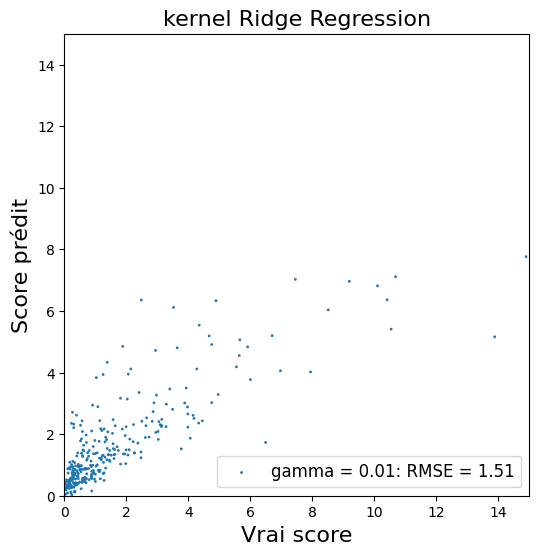

In [52]:
# créer une figure
fig = plt.figure(figsize=(6, 6))

# Compter, pour chaque paire de valeurs (y, y') où y est un vrai score et y' le score prédit,
# le nombre de ces paires.
# Ce nombre sera utilisé pour modifier la taille des marqueurs correspondants 
# dans un nuage de points
sizes = {}
for (yt, yp) in zip(list(y_test), list(y_pred)):
    if (yt, yp) in sizes.keys():
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1        
keys = sizes.keys()

# afficher les prédictions
plt.scatter([k[0] for k in keys], 
            [k[1] for k in keys], 
             s=[sizes[k] for k in keys], 
            label="gamma = 0.01: RMSE = {:.2f}".format(rmse))

# étiqueter les axes et le graphique
plt.xlabel('Vrai score', fontsize=16)
plt.ylabel(u'Score prédit', fontsize=16)
plt.title('kernel Ridge Regression', fontsize=16)

# limites des axes
plt.xlim([0, 15])
plt.ylim([0, 15])

# afficher la légende
plt.legend(loc="lower right", fontsize=12)

### 3.3.3 Adapter hyperparamètre 

A:  cherche la valeur optimale de hyperparamètres alpha et gamma au sein de noyau rbf

In [53]:
# valeurs du paramètre C
alpha_range = np.logspace(-2, 2, 5)

# valeurs du paramètre gamma
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}

# score pour sélectionner le modèle optimal
score = 'neg_root_mean_squared_error'

# initialiser la validation croisée
grid_pred = model_selection.GridSearchCV( \
        kernel_ridge.KernelRidge(kernel='rbf'),
        param_grid,
        cv=5,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train_std, y_train)

# prédire sur le jeu de test avec le modèle sélectionné 
y_test_pred_cv = grid_pred.predict(X_test_std)

# calculer la RMSE correspondante
rmse_cv = np.sqrt(mean_squared_error(y_test, y_test_pred_cv))

# afficher les paramètres optimaux
print("The optimal parameters are {} with a score of {:.2f}".format(grid_pred.best_params_, grid_pred.best_score_))

The optimal parameters are {'alpha': 0.01, 'gamma': 0.01} with a score of -1.40


In [54]:
print("RMSE: {:.2f}".format(rmse_cv))

RMSE: 1.27


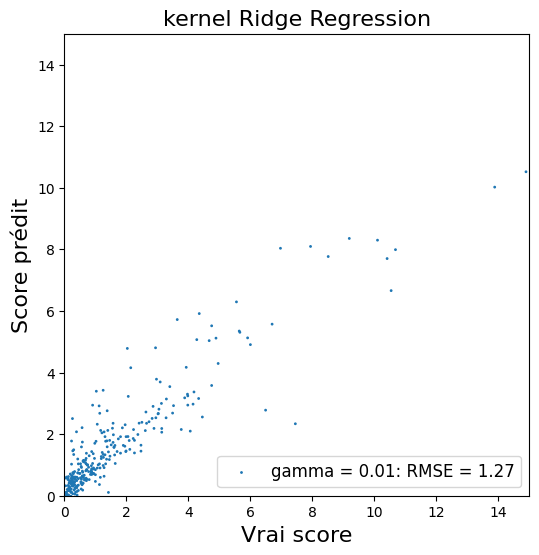

In [55]:
# créer une figure
fig = plt.figure(figsize=(6, 6))

# Compter, pour chaque paire de valeurs (y, y') où y est un vrai score et y' le score prédit,
# le nombre de ces paires.
# Ce nombre sera utilisé pour modifier la taille des marqueurs correspondants 
# dans un nuage de points
sizes = {}
for (yt, yp) in zip(list(y_test), list(y_test_pred_cv)):
    if (yt, yp) in sizes.keys():
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1        
keys = sizes.keys()

# afficher les prédictions
plt.scatter([k[0] for k in keys], 
            [k[1] for k in keys], 
             s=[sizes[k] for k in keys], 
            label="gamma = 0.01: RMSE = {:.2f}".format(rmse_cv))

# étiqueter les axes et le graphique
plt.xlabel('Vrai score', fontsize=16)
plt.ylabel(u'Score prédit', fontsize=16)
plt.title('kernel Ridge Regression', fontsize=16)

# limites des axes
plt.xlim([0, 15])
plt.ylim([0, 15])

# afficher la légende
plt.legend(loc="lower right", fontsize=12)

B:  cherche la valeur optimale de hyperparamètres alpha et gamma avec tous les noyau

In [ ]:
# valeurs du paramètre C
param_grid = {
    "alpha": [1e-3, 1e-2, 1e-1, 1],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": np.logspace(-2, 2, 5)
}

# Create a KRR model
krr = KernelRidge()

score = 'neg_root_mean_squared_error'

# Perform a grid search to find the best hyperparameters
grid_pred = model_selection.GridSearchCV(krr, param_grid, cv=5, scoring=score)
grid_pred.fit(X_train_std, y_train)

# Print the best hyperparameters
print(grid_pred.best_params_)

# prédire sur le jeu de test avec le modèle sélectionné 
y_test_pred_cv = grid_pred.predict(X_test_std)

# calculer la RMSE correspondante
rmse_cv = np.sqrt(mean_squared_error(y_test, y_test_pred_cv))


In [57]:
print("RMSE: {:.2f}".format(rmse_cv))

RMSE: 1.27


# 3.3.4  Modèle ensembliste parallèle

Ramdon forest est adapté pour prédiction par regression 

In [58]:
from sklearn.ensemble import RandomForestRegressor

# Division des données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construction de la forêt aléatoire avec 100 arbres de décision
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Apprentissage du modèle sur les données d'apprentissage
rf.fit(X_train, y_train)

# Prédiction des valeurs de la variable cible pour les données de test
y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 1.60


Bagging

In [61]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Division des données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construction du modèle de bagging avec 10 arbres de décision
bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                            n_estimators=10, random_state=42)

# Apprentissage du modèle sur les données d'apprentissage
bagging.fit(X_train, y_train)

# Prédiction des valeurs de la variable cible pour les données de test
y_pred = bagging.predict(X_test)

# Evaluation de la précision des prévisions
mse = mean_squared_error(y_test, y_pred)
print('MSE: {:.2f}'.format(mse))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

MSE: 2.32
RMSE: 1.55


# 3.3.5 Modèle ensembliste séquentielle 
GBoost  est adapté pour prédiction par regression 

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

# Division des données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialiser le modèle Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entraîner le modèle sur l'ensemble de données d'entraînement
gb_reg.fit(X_train, y_train)

# Prédire les valeurs de sortie sur l'ensemble de données de test
y_pred = gb_reg.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE) du modèle
mse = mean_squared_error(y_test, y_pred)
print('MSE du modèle : {:.2f}'.format(mse))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

MSE du modèle : 2.40
RMSE: 1.55


# 4. Prédiction de consommation 

## 4.1 Vérification linéaire

In [ ]:
c_dependent_variable = 'SiteEUI(kBtu/sf)'
consommation_variables = ['CouncilDistrictCode','YearBuilt','NumberofFloors', 'ENERGYSTARScore', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'PrimaryPropertyType_encoded']

## 4.2. préparation des données

In [ ]:
# créer la matrice de données
X = data[consommation_variables].values

# créer le vecteur d'étiquettes
y = data[c_dependent_variable].values

In [ ]:
print(y)

In [ ]:
# séparation de train et test 
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.2)

In [ ]:
# normalisation
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [ ]:
print("X_train shape:", X_train.shape)



## 4.3 Choix de modèle et noyau
### 4.3.1 Modèle avec noyau linéaire (baseline)

In [ ]:
model = LinearRegression()
model.fit(X_train_std, y_train)

In [ ]:
y_pred = model.predict(X_test_std)
mse = mean_squared_error(y_test, y_pred)
print("MSE : {:.2f}".format(mse))

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

In [ ]:
# Entraîner un modèle de régression Ridge à noyau
model = KernelRidge(alpha=1, kernel='linear')
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
mse = mean_squared_error(y_test, y_pred)
print("MSE : {:.2f}".format(mse))

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

### 4.3.2 Modèle avec noyau rbf

In [ ]:
# Entraîner un modèle de régression Ridge à noyau
model = KernelRidge(alpha=1, kernel='rbf', gamma=0.01)
model.fit(X_train_std, y_train)

In [ ]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test_std)
# Calculer l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

Le MSE et RMSE est meilleure que le baseline

In [ ]:
# créer une figure
fig = plt.figure(figsize=(6, 6))

# Compter, pour chaque paire de valeurs (y, y') où y est un vrai score et y' le score prédit,
# le nombre de ces paires.
# Ce nombre sera utilisé pour modifier la taille des marqueurs correspondants 
# dans un nuage de points
sizes = {}
for (yt, yp) in zip(list(y_test), list(y_pred)):
    if (yt, yp) in sizes.keys():
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1        
keys = sizes.keys()

# afficher les prédictions
plt.scatter([k[0] for k in keys], 
            [k[1] for k in keys], 
             s=[sizes[k] for k in keys], 
            label="gamma = 0.01: RMSE = {:.2f}".format(rmse))

# étiqueter les axes et le graphique
plt.xlabel('Vrai score', fontsize=16)
plt.ylabel(u'Score prédit', fontsize=16)
plt.title('kernel Ridge Regression', fontsize=16)

# limites des axes
plt.xlim([0, 300])
plt.ylim([0, 300])

# afficher la légende
plt.legend(loc="lower right", fontsize=12)


### 4.3.3 Adapter hyperparamètre
cherche la valeur optimale de hyperparamètres alpha et gamma

In [ ]:
# valeurs du paramètre C
alpha_range = np.logspace(-2, 2, 5)

# valeurs du paramètre gamma
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}

# score pour sélectionner le modèle optimal
score = 'neg_root_mean_squared_error'

# initialiser la validation croisée
grid_pred = model_selection.GridSearchCV( \
        kernel_ridge.KernelRidge(kernel='rbf'),
        param_grid,
        cv=5,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train_std, y_train)

# prédire sur le jeu de test avec le modèle sélectionné 
y_test_pred_cv = grid_pred.predict(X_test_std)

# calculer la RMSE correspondante
rmse_cv = np.sqrt(mean_squared_error(y_test, y_test_pred_cv))

# afficher les paramètres optimaux
#print("The optimal parameters are {} with a score of {:.2f}".format(grid_pred.best_params_, grid_pred.best_score_))
print("RMSE: {:.2f}".format(rmse_cv))
